In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from gensim.models import Word2Vec
from clean import review2sentences, review2wordlist

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [3]:
def get_clean_reviews(reviews):
    clean_reviews = []
    for review in reviews:
        clean_reviews.append(review2wordlist(review, no_stopwords=True))
    return clean_reviews

In [4]:
def make_feature_vector(words, model, num_features):
    feature_vector = np.zeros((num_features, ), dtype="float32")
    nwords = 0.
    index2word_set = set(model.index2word)
    for word in words:
        if word in index2word_set:
            nwords += 1.
            feature_vector = np.add(feature_vector, model[word])
    feature_vector = np.divide(feature_vector, nwords)
    return feature_vector

In [5]:
def get_average_feature_vector(reviews, model, num_features):
    counter = 0.
    review_feature_vectors = np.zeros((len(reviews), num_features), dtype="float32")
    for review in reviews:
        if counter % 1000. == 0. :
            print("Review %d of %d" % (counter, len(reviews)))
        review_feature_vectors[counter] = make_feature_vector(review, model, num_features)
        counter += 1.
    return review_feature_vectors

In [6]:
model = Word2Vec.load('caches/300features_40minwords_10context')

In [7]:
raw_train = pd.read_csv('data/labeledTrainData.tsv', header=0, delimiter="\t", quoting=3)

In [11]:
train_set_features = get_average_feature_vector(get_clean_reviews(raw_train["review"]), model, 300)

Review 0 of 25000
Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 20000 of 25000
Review 21000 of 25000
Review 22000 of 25000
Review 23000 of 25000
Review 24000 of 25000


In [14]:
train_set_labels = raw_train["sentiment"]

In [12]:
rf = RandomForestClassifier(n_estimators=100)
gnb = GaussianNB()
lr = LogisticRegression()

In [13]:
from roc_plot import roc_plot_nocv

start training and validating...
RandomForestClassifier done
GaussianNB done
LogisticRegression done


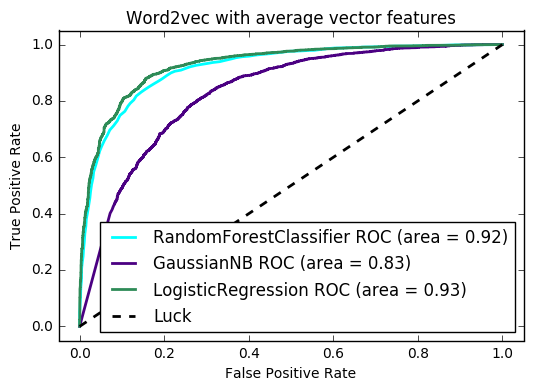

In [15]:
aucs = roc_plot_nocv(classifiers=[rf, gnb, lr], X=train_set_features, y=train_set_labels, plot_title="Word2vec with average vector features")